In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
df_train = pd.read_csv('house_prices/train.csv', index_col = 0) #read train file
df_test = pd.read_csv('house_prices/test.csv', index_col = 0) #read test file

In [3]:
print(df_train.shape, df_test.shape) #test missing SalePrice column

(1460, 80) (1459, 79)


In [4]:
df_train.head() #see columns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


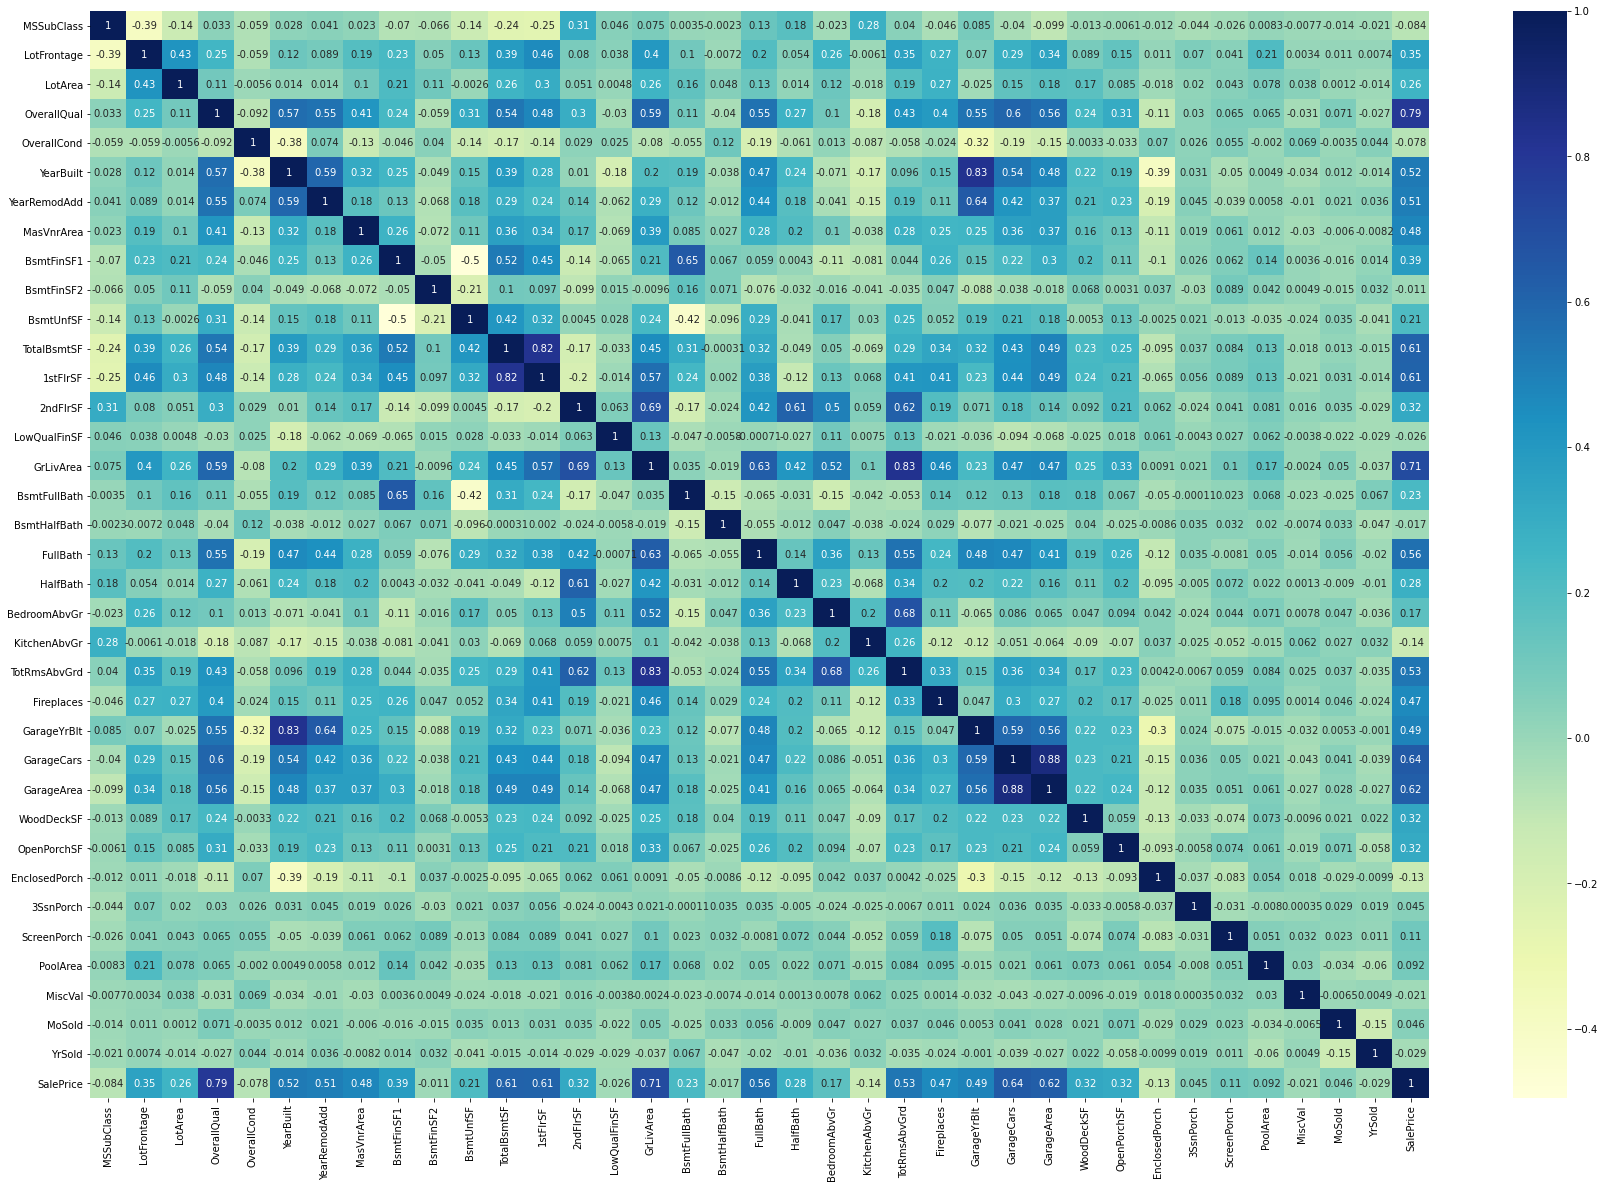

In [5]:
plt.figure(figsize = (30, 20))
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)

Correlation of target variable

In [9]:
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

C:\Users\napis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


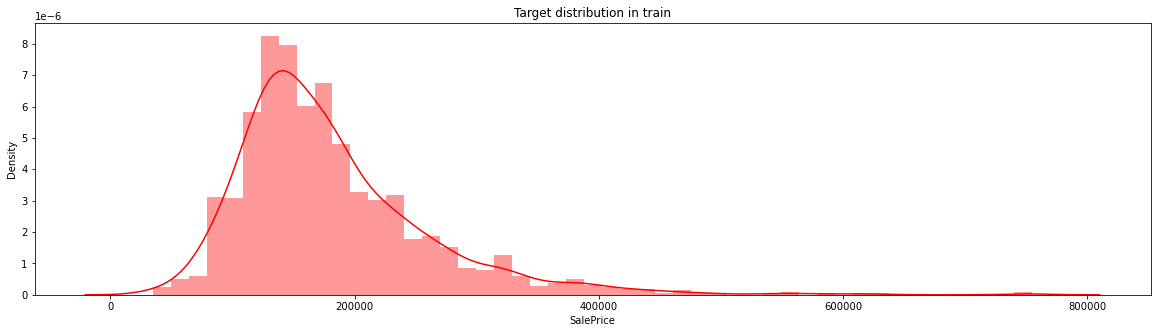

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(df_train['SalePrice'], color="red")
plt.title("Target distribution in train")
plt.ylabel("Density");

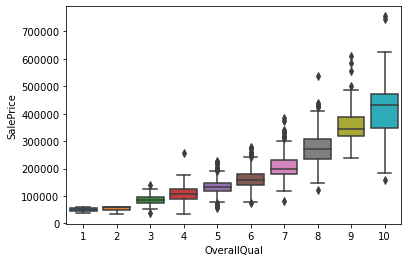

In [11]:
sns.boxplot(x = df_train['OverallQual'], y = df_train['SalePrice']);

In [12]:
df_train.columns.difference(df_test.columns)

Index(['SalePrice'], dtype='object')

In [14]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log) #standard normal distribution curve for more accurate predictions
target = df_train[['SalePrice']] #target prices array 
df_train.drop(['SalePrice'], axis = 1, inplace=True) #features array


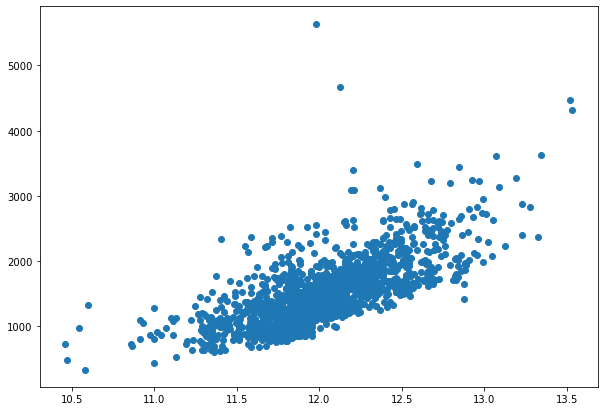

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(target, df_train['GrLivArea'])

In [23]:
df_train['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

C:\Users\napis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


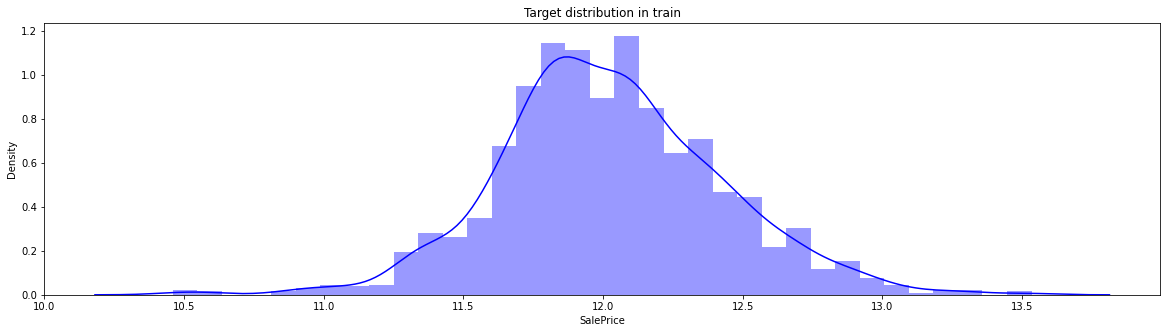

In [24]:
plt.figure(figsize=(20,5))
sns.distplot(target['SalePrice'], color="blue")
plt.title("Target distribution in train")
plt.ylabel("Density");

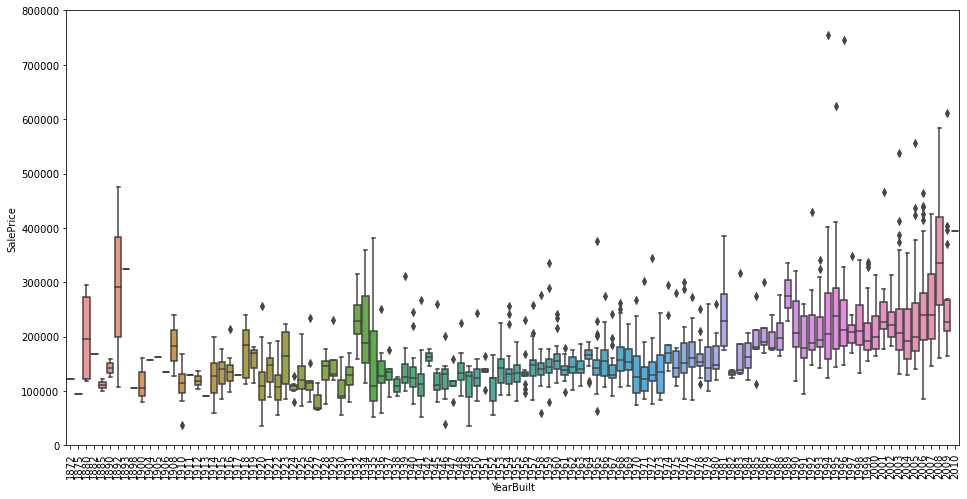

In [25]:
data = pd.concat([np.exp(target), df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

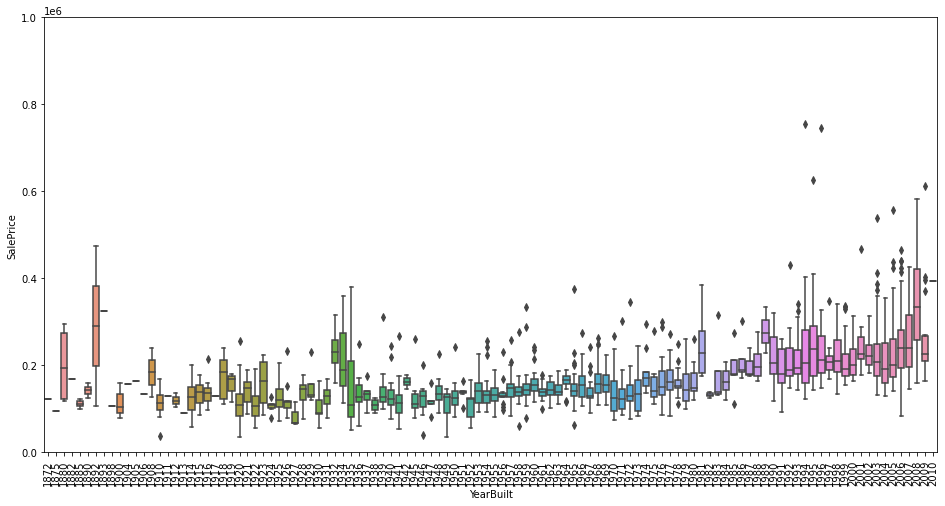

In [8]:
data = pd.concat([np.exp(target), df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=1000000);
plt.xticks(rotation=90);

# Data processing

In [26]:
df_all = pd.concat([df_train, df_test], axis = 0) #values in test missing from train -> 
                                                    #combine train + test data for encoding
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [28]:
pd.concat([df_train.isna().sum().rename('train'), df_test.isna().sum().rename('test')], axis=1).astype('int').sort_values(['train', 'test'], ascending=False)[:30]

,train,test
PoolQC,1453,1456
MiscFeature,1406,1408
Alley,1369,1352
Fence,1179,1169
FireplaceQu,690,730
LotFrontage,259,227
GarageYrBlt,81,78
GarageFinish,81,78
GarageQual,81,78
GarageCond,81,78


### House Age

In [29]:
df_all['Age'] = df_all['YrSold'] - df_all['YearBuilt'] #calculate Age column
df_all['AgeOfRemodel'] = df_all['YrSold'] - df_all['YearRemodAdd']
df_all.drop(['YearBuilt', 'YearRemodAdd',], axis = 1, inplace = True) #replace YearBuilt with Age
df_all.drop(['GarageArea', 'TotRmsAbvGrd'], axis = 1, inplace = True) # optional

### Dealing with unique values of object dtype

In [33]:
obj_columns = df_all.select_dtypes('object').columns

In [38]:
df_all[obj_columns].apply('nunique').sort_values(ascending=False).to_frame(name='num of unique values')

,num of unique values
Neighborhood,25
Exterior2nd,16
Exterior1st,15
SaleType,9
Condition1,9
Condition2,8
HouseStyle,8
RoofMatl,8
Functional,7
BsmtFinType2,6


### Filling empty values

In [13]:
df_all['LotFrontage'] = df_all.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))
        #numerically-based-important features filled with median value across similar neighborhoods

for feature in ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType']:
    df_all[feature] = df_all.groupby(['Neighborhood', 'MSSubClass'])[feature].apply(lambda x: x.fillna(x.mode()[0]))
        #frequency-based-importance features filled with mode value 

### Break into 3 DataFrames: scale, encode, ordinalize

In [32]:
ordinal = ['BsmtQual', 'MSSubClass', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleType', 'SaleCondition', 'ExterQual']
    #features with ranking for ordinalization
    #vetoed candidates: 'MSZoning', 'Condition1','Condition2', 'BldgType', 'HouseStyle'

df_scale = df_all.drop(ordinal, axis = 1).drop('MoSold', axis = 1).select_dtypes(exclude=[object]) #pre-scaled
df_encode = df_all.drop(df_scale.columns, axis = 1).drop(ordinal, axis = 1) #pre-encoded
df_ordinalize = df_all[ordinal] # pre-ordinalized data
print(df_scale.shape, df_encode.shape, df_ordinalize.shape)

(2919, 32) (2919, 31) (2919, 14)


In [33]:
# print(df_scale.columns)
# print(df_encode.columns)
# print(df_ordinalize.columns)

### Dealing with NAs

In [34]:
for feature in list(df_scale.columns):               #fill NAs in scale array with 0
    df_scale[feature] = df_scale[feature].fillna(0)

for feature in list(df_encode.columns):               #fill NAs in encode array with None
    df_encode[feature] = df_encode[feature].fillna('None')

In [35]:
def display_missing(df):    #function that checks for missing values
    for col in df.columns.tolist():
        if df[col].isnull().sum():
            print('{} column missing values: {}/{}'.format(col, df[col].isnull().sum(), len(df)))
    print('\n')

In [36]:
display_missing(df_encode)
display_missing(df_scale)

## Ordinal

In [37]:
df_ordinalize['SaleType'].unique() #find potential values for all ordinal data

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth',
       nan], dtype=object)

In [38]:
ordinal_dictionary = {None:None, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5,
    'Normal':6, 'Abnorml':5, 'AdjLand':4, 'Alloca':3, 'Family':2, 'Partial':1, #SaleCondition
    'WD':10, 'CWD':9, 'VWD':8, 'New':7, 'COD':6, 'Con':5, 'ConLw':4, 'ConLI':3, 'ConLD':2, 'Oth':1, #SaleType
    'Fin':3, 'RFn':2, 'Unf':1, #GarageFinish
    'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, #Functional
    'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, #BsmtFinType2
      20:16, 30:15, 40:14, 45:13, 50:12, 60:11, 70:10, 75:9, 80:8, 85:7, 90:6, 120:5, 150:4, 160:3, 180:2, 190:1} #MSSubClass
                     
keys = dict.keys(ordinal_dictionary)
values = dict.values(ordinal_dictionary)

In [39]:
df_ordinalize = df_ordinalize.replace(keys, values) #ordinalize the pre-ordinalized data`

In [40]:
df_ordinalize.shape

(2919, 14)

### House price dependancy of a category

## Encoding 

df_encode is used in catboost

In [41]:
df_encode_col = df_encode.columns #encode array changes -> variable for encoded array columns for future use

In [42]:
df_encode['MoSold'] = df_encode['MoSold'].astype(str)
# df_encode.dtypes

In [43]:
df_postencoded = pd.get_dummies(df_encode)
# df_postencoded.drop(df_encode.columns, axis = 1, inplace = True)
df_encode_train = df_postencoded[:len(target)] #drop + save train pre-encoded columns
df_encode_test = df_postencoded[len(target):] #drop + save test pre-encoded columns
df_encode_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [44]:
# for f in df_encode.columns:
#     dummy_arr = pd.get_dummies(df_encode[f], prefix=f, dummy_na=True)  #create dummy array
#     df_encode_concat = pd.concat([df_encode, dummy_arr], axis=1)  #concatinate dummy + encode array

# df_encode_train = df_encode_concat.drop(df_encode_col, axis=1)[:len(target)] #drop + save train pre-encoded columns
# df_encode_test = df_encode_concat.drop(df_encode_col, axis=1)[len(target):] #drop + save test pre-encoded columns

In [45]:
print(df_encode_train.shape, df_encode_test.shape)

(1460, 210) (1459, 210)


## Scaling

In [46]:
df_scale = df_scale.join(df_ordinalize) # joined together the scale df and ordinal df

In [47]:
df_scale.fillna(0,inplace=True)

In [48]:
# list(enumerate(df_scale.columns))

In [49]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler() 
scaled_all = scaled_data.fit_transform(df_scale) #scale train data (1st half of full data)
scaled_X_train = scaled_all[:len(target)]
scaled_X_test = scaled_all[len(target):] #scale test data (2nd half of full data)

In [50]:
print(df_encode_train.shape, scaled_X_train.shape, df_encode_test.shape, scaled_X_test.shape)

(1460, 210) (1460, 46) (1459, 210) (1459, 46)


## Clusterization

In [51]:
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import rand_score, jaccard_score, adjusted_mutual_info_score, silhouette_score
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering

In [52]:
scaled_all.shape

(2919, 46)

In [53]:
df_cluster = pd.DataFrame(data = scaled_all, columns = df_scale.columns)
df_cluster.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,SaleType,SaleCondition,ExterQual
0,0.216075,-0.217879,0.646183,-0.507284,0.529034,0.581145,-0.293025,-0.934165,-0.443078,-0.773861,...,0.737021,0.234116,-0.978830,0.316551,0.278091,0.268343,-0.056542,0.357727,0.394298,1.039805
1,0.664158,-0.072044,-0.063185,2.188279,-0.567016,1.178255,-0.293025,-0.629284,0.477463,0.261075,...,-0.766379,0.234116,0.682014,0.316551,0.278091,0.268343,-0.056542,0.357727,0.394298,-0.683756
2,0.305692,0.137197,0.646183,-0.507284,0.338903,0.098189,-0.293025,-0.287999,-0.297968,-0.610718,...,0.737021,0.234116,0.682014,0.316551,0.278091,0.268343,-0.056542,0.357727,0.394298,1.039805
3,0.066714,-0.078385,0.646183,-0.507284,-0.567016,-0.494529,-0.293025,-0.046824,-0.669812,-0.506205,...,0.737021,0.234116,1.235629,-0.798060,0.278091,0.268343,-0.056542,0.357727,-0.284732,-0.683756
4,0.783647,0.518903,1.355551,-0.507284,1.390216,0.469187,-0.293025,-0.160586,0.212184,-0.037170,...,0.737021,0.234116,0.682014,0.316551,0.278091,0.268343,-0.056542,0.357727,0.394298,1.039805


In [54]:
pca = PCA()
pca.fit(df_cluster)
pca.explained_variance_ratio_

array([1.95437846e-01, 7.05872200e-02, 5.98351360e-02, 5.71687506e-02,
       4.67130222e-02, 3.73807951e-02, 3.65181266e-02, 3.34202920e-02,
       2.91637658e-02, 2.63072114e-02, 2.52483517e-02, 2.40559031e-02,
       2.35025812e-02, 2.22852025e-02, 2.21106613e-02, 2.13298518e-02,
       2.07343191e-02, 2.01227604e-02, 1.95368210e-02, 1.80751502e-02,
       1.69066349e-02, 1.64104715e-02, 1.51618737e-02, 1.45291754e-02,
       1.32816025e-02, 1.21261740e-02, 1.12473541e-02, 9.89159938e-03,
       9.23020537e-03, 8.53912435e-03, 7.80989481e-03, 7.34112228e-03,
       6.74590714e-03, 6.13282661e-03, 6.01054417e-03, 5.32170269e-03,
       4.74083704e-03, 4.30728871e-03, 3.91901794e-03, 3.17262553e-03,
       3.02844424e-03, 2.46935045e-03, 1.15371698e-03, 9.88738232e-04,
       3.85433191e-32, 1.16519181e-33])

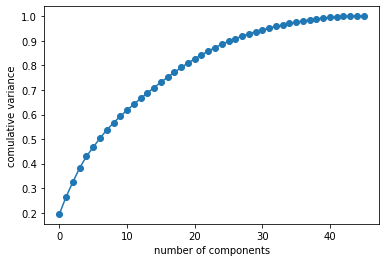

In [55]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o' )
plt.xlabel('number of components')
plt.ylabel('comulative variance');

In [56]:
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(df_cluster)

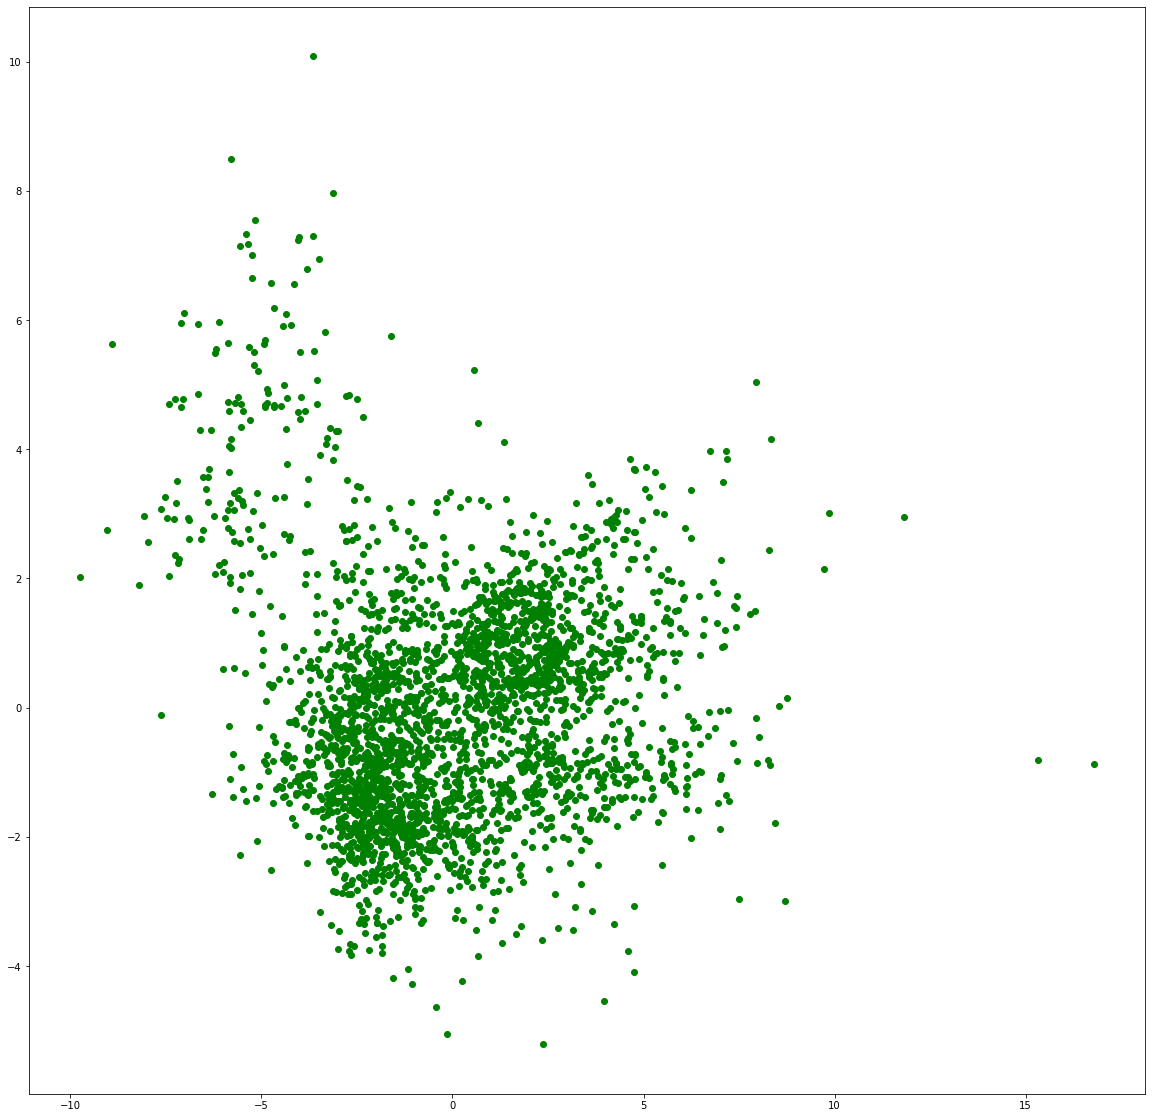

In [57]:
plt.figure(figsize=(20,20))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='g')


In [58]:
N = 20
wcss = []
for i in range(1,N):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

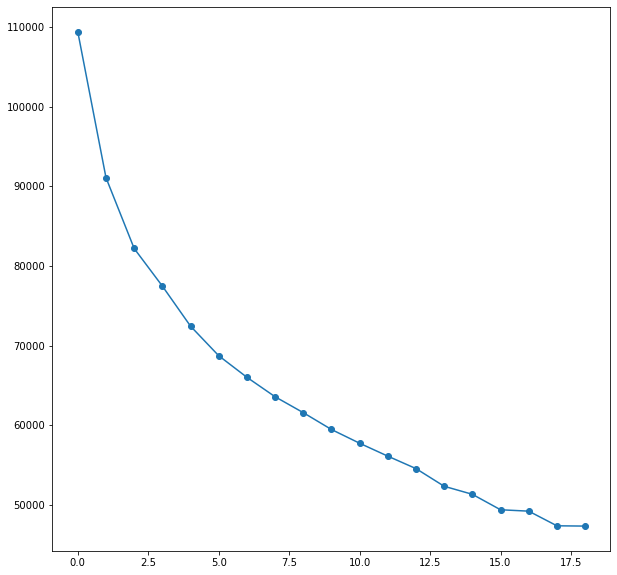

In [101]:
plt.figure(figsize = (10,10))
plt.plot(wcss, marker = 'o')

In [59]:
kmeans_pca = KMeans(n_clusters=15, init='k-means++', random_state = 42)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=15, random_state=42)

In [63]:
df_kmeans = pd.DataFrame(data = kmeans_pca.labels_, columns = ['Kmeans_pca'])
df_kmeans_scaled = scaled_data.fit_transform(df_kmeans)
df_kmeans_scaled

array([[ 0.05578045],
       [ 2.34101723],
       [ 0.05578045],
       ...,
       [ 1.48405344],
       [-1.37249254],
       [ 0.05578045]])

In [ ]:
# aoutlier_indexes = df_cluster[dbs.labels_ == -1].index

# df_scale = df_scale[~df_scale.index.isin(outlier_indexes)]
# df_encode = df_encode[~df_encode.index.isin(outlier_indexes)]
# df_ordinalize = df_ordinalize[~df_ordinalize.index.isin(outlier_indexes)]
# df_all = df_all[~df_all.index.isin(outlier_indexes)]
# target = target[~target.index.isin(outlier_indexes)]

# print(df_scale.shape, df_encode.shape, df_ordinalize.shape, df_all.shape, target.shape)

### Combining data

In [64]:
scaled_encoded_train = np.concatenate([np.array(scaled_X_train), np.array(df_encode_train), df_kmeans_scaled[:len(target)]], axis=1) 
                                                                                        #train encoded+scale
scaled_encoded_test = np.concatenate([np.array(scaled_X_test), np.array(df_encode_test), df_kmeans_scaled[len(target):]], axis=1) 
                                                                                        #test encoded+scale

In [66]:
y = target # make y-train so easier afterwards

In [67]:
print(scaled_encoded_train.shape, y.shape)  #check if shapes are combinable

(1460, 257) (1460, 1)


#### <font color='red'>Save a copy of processed data for future reference!!</font>

In [90]:
# df_all_imp = pd.concat([scaled_encoded_train, target], axis =1) #combine xs and target
# df_all_imp.to_csv('House_data_improved.csv', index=False) #save as csv

# MODELS

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(scaled_encoded_train, y, test_size=0.2)

In [124]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    print(f"train: {model.score(X_train, y_train):.5f}", end=" ")
    print(f"test: {model.score(X_test, y_test):.5f}")

    print(f"train mean squared log error: {mean_squared_log_error(y_train, model.predict(X_train)):.6f}", end=" ")
    print()
    print(f"test mean squared log error: {mean_squared_log_error(y_test, model.predict(X_test)):.6f}")

    fig, ax = plt.subplots(figsize=(6, 6))
    pred_X_train = np.array(model.predict(X_train))
    pred_X_test = np.array(model.predict(X_test))

    ax.plot(np.exp(y_train)/10000, np.exp(pred_X_train)/10000, 'o', mec="w", label="train")
    ax.plot(np.exp(y_test)/10000, np.exp(pred_X_test)/10000, 'o', mec="w", label="test")
    ax.plot([0,80],[0, 80], color='k', lw=0.5)
    ax.set_xlabel("SalePrice Ground Truth x10000")
    ax.set_ylabel("Predictions x10000")
    ax.legend(loc=2)

In [125]:
results = {'Model' : [], 
          'MSLE' : [],
          'Kaggle_Score': []}

## KNeighborsRegressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [127]:
clf_KNR = KNeighborsRegressor(n_neighbors=10)
clf_KNR_pred = clf_KNR.fit(X_train, y_train)



MSE_KNR = mean_squared_error(clf_KNR.predict(X_test), y_test)
MSLE_KNR = mean_squared_log_error(clf_KNR.predict(X_test), y_test)


# print(abs(cross_val_score(clf_KNR, scaled_encoded_train, y, cv=4, scoring = 'neg_mean_squared_log_error')).mean())

print(f'MSE for KNeighborsRegressor: {MSE_KNR}')
print(f'MSLE for KNeighborsRegressor: {MSLE_KNR}')
results['Model'].append('KNeighborsRegressor')
results['MSLE'].append(MSLE_KNR)
results['Kaggle_Score'].append(0)

MSE for KNeighborsRegressor: 0.033375767152536755
MSLE for KNeighborsRegressor: 0.00020416027025032748


train: 0.84237 test: 0.80818
train mean squared log error: 0.000145 
test mean squared log error: 0.000204


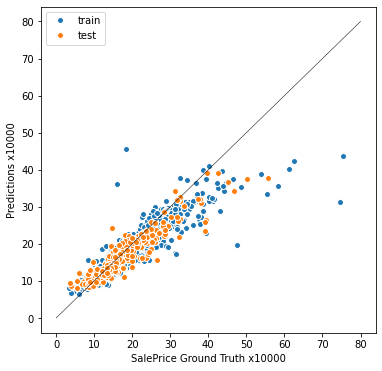

In [128]:
evaluate_model(clf_KNR_pred, X_train, X_test, y_train, y_test)

In [129]:
# clf_KNR_res = clf_KNeighborsRegressor.predict(scaled_encoded_test)

In [130]:
# final_x = clf_StackingRegressor.predict(scaled_encoded_test)
# final_data = pd.concat([pd.DataFrame(df_test.index), pd.DataFrame(final_x, columns=[target])], axis=1)
# final_data.to_csv(f"project_clf_KNR.csv", columns=["Id", "SalePrice"], index=False)

## Linear Regression

train: 0.93895 test: 0.89628
train mean squared log error: 0.000057 
test mean squared log error: 0.000111


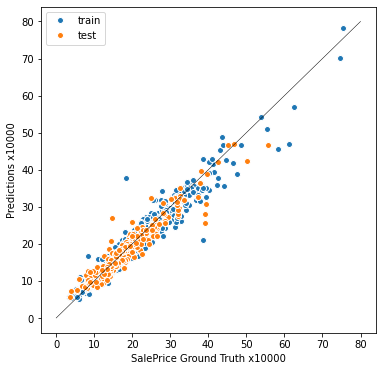

In [131]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
clf = Ridge(alpha=100)
tt = TransformedTargetRegressor(regressor=clf, func=np.log, inverse_func=np.exp)
# columnn transformer
model = Pipeline([
    ('sca', StandardScaler()),
    ('clf', tt)
])

model.fit(X_train, y_train)
evaluate_model(model, X_train, X_test, y_train, y_test)

## RandomForestRegressor

In [132]:
from sklearn.ensemble import RandomForestRegressor

clf_RFR = RandomForestRegressor(max_depth=None, random_state=0)
clf_RFR.fit(X_train, y_train.values.ravel())

MSE_RFR = mean_squared_error(clf_RFR.predict(X_test), y_test)
MSLE_KNR = mean_squared_log_error(clf_RFR.predict(X_test), y_test)

# print(abs(cross_val_score(clf_RFR, scaled_encoded_train, y, cv=4, scoring = 'neg_mean_squared_log_error')).mean())


print(f'MSE for RandomForestRegressor: {MSE_RFR}')
print(f'MSLE for RandomForestRegressor: {MSLE_KNR}')

results['Model'].append('RandomForestRegressor')
results['MSLE'].append(MSLE_KNR)
results['Kaggle_Score'].append(0)

MSE for RandomForestRegressor: 0.02786007408953578
MSLE for RandomForestRegressor: 0.00017209119841378844


train: 0.98166 test: 0.83988
train mean squared log error: 0.000017 
test mean squared log error: 0.000172


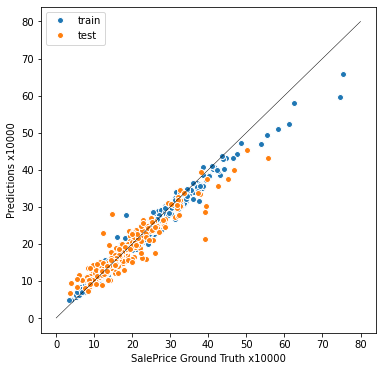

In [133]:
evaluate_model(clf_RFR, X_train, X_test, y_train, y_test)

In [ ]:
# clf_RFR.feature_importances_

## Stacking

In [81]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

estimators = [
     ('rf', RandomForestRegressor(max_depth=None, random_state=0)),
     ('knn', KNeighborsRegressor(n_neighbors=10))]

clf_StackingRegressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LGBMRegressor(seed=42))
    
clf_StackingRegressor.fit(X_train, y_train.values.ravel())

MSE_StackingRegressor = mean_squared_error(clf_StackingRegressor.predict(X_test), y_test)**0.5
MSLE_StackingRegressor = mean_squared_log_error(clf_StackingRegressor.predict(X_test), y_test)**0.5


print(f'MSE for StackingRegressor: {MSE_StackingRegressor}')
print(f'MSLE for StackingRegressor: {MSLE_KNR}')

results['Model'].append('StackingRegressor')
results['MSLE'].append(MSLE_StackingRegressor)
results['Kaggle_Score'].append(0)

MSE for StackingRegressor: 0.15040864525189973
MSLE for StackingRegressor: 0.00013187029021744025


train: 0.93898 test: 0.83864
train mean squared log error: 0.000055 
test mean squared log error: 0.000160


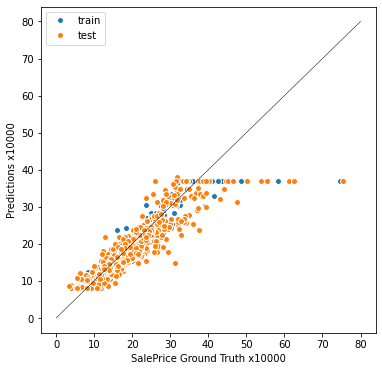

In [101]:
evaluate_model(clf_StackingRegressor, X_train, X_test, y_train, y_test)

In [102]:
pd.DataFrame(results)

,Model,MSLE,Kaggle_Score
0,KNeighborsRegressor,0.013962,0
1,RandomForestRegressor,0.011675,0
2,StackingRegressor,0.012647,0


## XGBoost

In [120]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgbr = xgb.XGBRegressor()

In [121]:
params = {'learning_rate': [0.02], 'n_estimators' : [2000], 'max_depth':[3], 
          'colsample_bytree' : [0.4], 'subsample' : [0.7]}

In [135]:
print(X_train.shape, y_train.shape)

(1168, 257) (1168, 1)


In [136]:
xgbr_reg = GridSearchCV(xgbr, params, cv = 5, n_jobs =-1)
xgbr_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [140]:
xgbr_model = xgbr_reg.best_estimator_
y_train_pred = xgbr_model.predict(X_train)
y_eval_pred = xgbr_model.predict(X_test)
print(f'RMSE train: {mean_squared_error(y_train, y_train_pred)**0.5}')
print(f'RMSE test: {mean_squared_error(y_test, y_eval_pred)**0.5}')

RMSE train: 0.043718063999948965
RMSE test: 0.13625494274316372


In [141]:
submission

,Id,SalePrice
0,1461,119579.012545
1,1462,153257.067388
2,1463,186263.035295
3,1464,192415.350894
4,1465,193120.145686
...,...,...
1454,2915,90393.023030
1455,2916,94824.350944
1456,2917,165241.297438
1457,2918,117523.396417


In [144]:
final_pred = xgbr_model.predict(scaled_encoded_test)
df_submission = pd.DataFrame({'Id':submission['Id'], 'SalePrice': np.exp(final_pred)})

In [145]:
df_submission.to_csv('submission_xgb.csv', index=False)

## CAT boost 

In [88]:
import catboost as cb
from catboost import CatBoostRegressor, Pool, cv
import shap

### Training data

In [89]:
x_train = np.concatenate([scaled_X_train, df_encode[:len(target)], df_kmeans_scaled[:len(target)]], axis=1)

In [103]:
scaled_X_train.shape

(1460, 46)

In [83]:
# x_train_unscaled = pd.concat([df_scale[:len(target)], df_encode[:len(target)]], axis=1)

In [105]:
cat_features = list(range(scaled_X_train.shape[1], x_train.shape[1] - 1))
print(cat_features, len(cat_features))

[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76] 31


### Testing data

In [106]:
print(x_train.shape, y.shape)

(1460, 78) (1460, 1)


In [107]:
x_test = np.concatenate([scaled_X_test, df_encode[len(target):], df_kmeans_scaled[len(target):]], axis=1)

In [108]:
print(x_test.shape)

(1459, 78)


In [109]:
# x_test_unscaled = pd.concat([df_scale[len(target):], df_encode[len(target):]], axis=1)

In [110]:
model_CB = CatBoostRegressor(
    iterations = 20000,
    learning_rate = 0.001,
    eval_metric = 'RMSE',
    random_seed = 42,
    logging_level=  'Silent',
    loss_function = 'RMSE',
    od_type = 'Iter',
    od_wait = 1000,
    one_hot_max_size = 20,
    l2_leaf_reg = 100,
    depth = 3,
    rsm = 0.6,
    random_strength = 2,
    bagging_temperature = 10
)

In [111]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'learning_rate': [0.01, 1.0],
#     'iterations':[9000,11000],
#     'learning_rate':[0.01, 1.0],
#     'depth':[None,1,2,3,5,10,20,30],
#     'random_seed':[10,20,30, 40, 42, 50],
#     'loss_function':['RMSE','MAE','Poisson','MAPE'],
#     'metric_period':[1, 5],
#     'od_type':['Iter'],
#     'od_wait':[500, 700, 1000, 1200, 1500],
#     'one_hot_max_size': [None,1,2,3,5,10,20,30],
#     'l2_leaf_reg':[50, 75, 100, 125],
#     'rsm':[.1, 2],
#     'random_strength':[1, 3],
#     'bagging_temperature':[None,5,10,20],
#     }

# cv = GridSearchCV(model_CB, 
#                   param_grid=params, 
#                   scoring='neg_mean_squared_error',
#                   cv=5, # divide into 5 parts
#                   refit=True, # choose best model + make it test
#                   n_jobs=4,# number of flows to count
#                   verbose=5)
# cv.fit(x_train, y)

# print(cv.best_params_)

In [112]:
model_CB.fit(
    x_train, y,
    cat_features=cat_features,
    verbose=False)

print('Model is fitted: ' + str(model_CB.is_fitted()))
print('Model params:')
print(model_CB.get_params())
RMSE_CatBoostRegressor = mean_squared_error(model_CB.predict(x_train), y)**0.5
RMSLE_CatBoostRegressor = mean_squared_log_error(model_CB.predict(x_train), y)**0.5

# MSE_LGBM = mean_squared_error(MSE_CatBoostRegressor.predict(scaled_train_data), data_target)**0.5
print(f' RMSE {RMSE_CatBoostRegressor}')
print( f' RMSLE {RMSLE_CatBoostRegressor}')

Model is fitted: True
Model params:
{'iterations': 20000, 'learning_rate': 0.001, 'depth': 3, 'l2_leaf_reg': 100, 'rsm': 0.6, 'loss_function': 'RMSE', 'od_wait': 1000, 'od_type': 'Iter', 'random_seed': 42, 'logging_level': 'Silent', 'one_hot_max_size': 20, 'random_strength': 2, 'eval_metric': 'RMSE', 'bagging_temperature': 10}
 RMSE 0.12408306664173982
 RMSLE 0.009629742280754144


## Feature importance

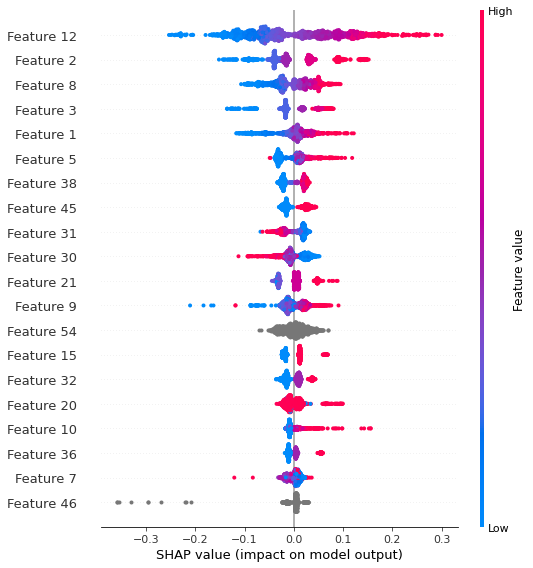

In [111]:

shap_values = model_CB.get_feature_importance(Pool(x_train, label = y , cat_features=cat_features), type='ShapValues')
shap_values = shap_values[:,:-1]


shap.summary_plot(shap_values, x_train)

The plot shows a cumulation of many dots. The dots have three characteristics:

- The vertical location of the dots ranks the feature's significance to the target data
- The Color shows whether that feature value was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

In [ ]:
# list(enumerate(model_CB.feature_names_))

List of top 10 most important features by catboots

In [ ]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([df_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df.head(15)

List of top 10 least important features by catboots

In [ ]:
importance_df = importance_df.sort_values('shap_importance', ascending=True)
importance_df.head(10)
feat_to_del = importance_df[:10]
feat_to_del

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	N

LotFrontage

In [ ]:
shap.dependence_plot('Feature 13', shap_values, x_train) # feature 13 - 

In [ ]:
shap.dependence_plot('Feature 16', shap_values, x_train) # feature 16 - overal qual 

In [ ]:
x_train.shape

### Removing the least important features

In [ ]:
importance_df.index

In [ ]:
x_train_rwk = np.delete(x_train, [53, 77, 49 ,71], axis = 1)
x_test_rwk = np.delete(x_test, [53, 77, 49 ,71], axis = 1)

print(x_train_rwk.shape, x_test_rwk.shape)

In [ ]:
cat_features = list(range(scaled_X_train.shape[1], x_train.shape[1]-4))
print(cat_features)

In [ ]:
model_CB = CatBoostRegressor(
    iterations = 10000,
    learning_rate = 0.08,
    eval_metric = 'RMSE',
    random_seed = 42,
    logging_level=  'Silent',
    loss_function = 'RMSE',
    od_type = 'Iter',
    od_wait = 1000,
    one_hot_max_size = 20,
    l2_leaf_reg = 100,
    depth = 3,
    rsm = 0.6,
    random_strength = 2,
    bagging_temperature = 10
)

In [ ]:
model_CB.fit(
    x_train_rwk, y,
    cat_features=cat_features,
    verbose=False)

print('Model is fitted: ' + str(model_CB.is_fitted()))
print('Model params:')
print(model_CB.get_params())
MSE_CatBoostRegressor = mean_squared_error(model_CB.predict(x_train_rwk), y)**0.5
# MSE_LGBM = mean_squared_error(MSE_CatBoostRegressor.predict(scaled_train_data), data_target)**0.5
print(MSE_CatBoostRegressor)

In [ ]:
# for i in df_encode.columns:
#     print(i , df_encode[i].unique())

In [ ]:
# for features in df_encode.columns:
#     print(df_encode_target.groupby(features)['SalePrice'].mean())

In [ ]:
# plt.figure(figsize=(18, 40))

# for i, j in enumerate(df_scale.columns):
#     plt.subplot(10, 2, i + 1)
#     ax = sns.scatterplot(data=df_train, x=f'{j}', y=target, hue='PriceAbvMedian')
#     ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
#     plt.title(f'Sale Price vs. {j}')
#     # Plot the best fit line
#     m, b = np.polyfit(x=df[j], y=df.SalePrice, deg=1)
#     plt.plot(df[j], m * df[j] + b, c='red')
#     # Plot the r-squared value
#     corr_matrix = np.corrcoef(df[j], df.SalePrice)    
#     corr_xy = corr_matrix[0,1]
#     r_squared = round((corr_xy ** 2), 4)    
#     plt.legend(labels=[f'R^2 = {r_squared}', 'Price Above Median', 'Price Below Median'], framealpha=0.5, loc=0)
    
# plt.tight_layout()
# plt.show()

# Submission

In [113]:
submission = pd.read_csv('house_prices/sample_submission.csv', index_col = 0)

In [114]:
CB_test = model_CB.predict(x_test)
submission.loc[df_test.index.values, "SalePrice"] = np.exp(CB_test)
submission = submission.reset_index()
submission.head()
# CB_test_results = pd.concat([pd.DataFrame(df_test.index), pd.DataFrame(CB_test, columns=[target])], axis=1)
# CB_test_results
# CB_test_res.to_csv("project_CatB_results3.csv", columns=["Id", "SalePrice"], index=False)

,Id,SalePrice
0,1461,119579.012545
1,1462,153257.067388
2,1463,186263.035295
3,1464,192415.350894
4,1465,193120.145686


In [115]:
 submission.to_csv("project_CatB_results11.csv", index=False)